# MSDS 670 Midterm Project
<br>Wiley Winters
<br>Regis University Anderson College of Business and Computing
<br>MSDS 670 Data Visualization
<br>Mr. John Koenig
<br>Febrary 11, 2024
### Research Question:
Do birth and death rates affect total population in the top ten economies?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
# Pandas has not been playing nice with this project
# Adding options to display numbers in float format
# and supress warnings on copy on write functions,
# 
pd.options.display.float_format = '{:.0f}'.format
pd.options.mode.copy_on_write = True
#
# Make plots pretty
#
plt.style.use('ggplot')

In [2]:
# Do not like the column names supplied by Data Bank.  Using shorter column names
# to avoid confusion
columns = ['country','cntry_code','series','series_code','1960','1965','1970',
           '1975','1980','1985','1990','1995','2000','2005','2010','2015','2020',
           '2022','2023','2024']
world_df = pd.read_csv('../data/worldPopulationData.csv',skiprows=1, names=columns,
                       na_values='..')

----------------------------------------------------------------------------------
## Basic EDA

In [3]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      50 non-null     object 
 1   cntry_code   50 non-null     object 
 2   series       50 non-null     object 
 3   series_code  50 non-null     object 
 4   1960         40 non-null     float64
 5   1965         50 non-null     float64
 6   1970         50 non-null     float64
 7   1975         50 non-null     float64
 8   1980         50 non-null     float64
 9   1985         50 non-null     float64
 10  1990         50 non-null     float64
 11  1995         50 non-null     float64
 12  2000         50 non-null     float64
 13  2005         50 non-null     float64
 14  2010         50 non-null     float64
 15  2015         50 non-null     float64
 16  2020         50 non-null     float64
 17  2022         30 non-null     float64
 18  2023         20 non-null     float64
 19  2024      

In [4]:
world_df.head(10)

,country,cntry_code,series,series_code,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2022,2023,2024
0,Brazil,BRA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44,40,36,33,32,29,25,22,20,17,15,15,13,NaN,NaN,NaN
1,Brazil,BRA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,14,12,11,10,9,8,7,7,6,6,6,6,7,NaN,NaN,NaN
2,Brazil,BRA,"Population ages 65 and above, total",SP.POP.65UP.TO,1921246,2437203,3066987,3795103,4642501,5558148,6729875,8134166,9679708,11461295,13563871,16222681,19807547,21265888,22101851,23039580
3,Brazil,BRA,Population growth (annual %),SP.POP.GROW,NaN,3,2,2,2,2,2,2,1,1,1,1,1,0,NaN,NaN
4,Brazil,BRA,"Population, total",SP.POP.TOTL,73092515,84623747,96369875,108700515,122288383,136783180,150706446,163515328,175873720,186797334,196353492,205188205,213196304,215313498,216422446,217637297
5,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,27,21,17,16,15,15,15,13,11,11,11,11,10,NaN,NaN,NaN
6,Canada,CAN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,8,8,7,7,7,7,7,7,7,7,7,7,8,NaN,NaN,NaN
7,Canada,CAN,"Population ages 65 and above, total",SP.POP.65UP.TO,1373988,1519291,1702610,1960638,2302843,2644549,3108392,3493208,3831961,4190005,4782333,5715697,6848293,7410039,7670567,7932928
8,Canada,CAN,Population growth (annual %),SP.POP.GROW,NaN,2,1,1,1,1,2,1,1,1,1,1,1,2,NaN,NaN
9,Canada,CAN,"Population, total",SP.POP.TOTL,17909356,19678000,21324000,23143275,24515667,25842116,27691138,29302311,30685730,32243753,34004889,35702908,38007166,38929902,39244168,39555364


In [5]:
world_df.isna().sum()

country         0
cntry_code      0
series          0
series_code     0
1960           10
1965            0
1970            0
1975            0
1980            0
1985            0
1990            0
1995            0
2000            0
2005            0
2010            0
2015            0
2020            0
2022           20
2023           30
2024           30
dtype: int64

------------------------------------------------------------------------------------
## Some basic data cleaning

The columns `cntry_code`, `series`, and `series_code` are not required for this study.  `1960` column contained some null values in the % growth series.  There is not enough data to extrapulate their values so I will just drop it.  Should not make too much of a difference on the final product

In [6]:
world_df.drop(['cntry_code','series','series_code'], inplace=True, axis=1)

-----------------------------------------------------------------------------
## Do some work

The format of the dataset is different from other timeseries studies I've worked with.  The first four columns are the country's name and country code.  The next two are the series and the series code.  Rest of the columns are the years and values being studied.

I will break the dataset into dataframes for each country and analyze them separately.  The order is from largest to smallest economies.

In [7]:
usa = world_df[world_df['country'] == 'United States']
chn = world_df[world_df['country'] == 'China']
deu = world_df[world_df['country'] == 'Germany']
jpn = world_df[world_df['country'] == 'Japan']
ind = world_df[world_df['country'] == 'India']
gbr = world_df[world_df['country'] == 'United Kingdom']
fra = world_df[world_df['country'] == 'France']
ita = world_df[world_df['country'] == 'Italy']
bra = world_df[world_df['country'] == 'Brazil']
can = world_df[world_df['country'] == 'Canada']

Since the dataset is in a series format, I will have to access each feature that I am interested in by its index.  In addition, to facilitate transforming the series into a visualization, I will drop the country and series columns.  For the first part of this study, I will visualize birth and death rates.  There is population data for 2022, 2023, and 2024, but no birth or death rates; therefore, I will drop these columns also.

The series of interests include birth rate and death rate.  These will be accessed by their index instead of name.  The indexes are as follows:
- 0  *Birth Rate*
- 1  *Death Rate*
- 2  *Population over 65*
- 3  *Population change in percent*
- 4  *Total population*

-------------------------------------------------------------------------------------
Create dataframes and series to plot United States population data

In [8]:
# Drop unused column
usa.drop('country', inplace=True, axis=1)
us_birth = usa.iloc[0]  # Birthrate per 1000
us_death = usa.iloc[1]  # Deathrate per 1000
us_over65 = usa.iloc[2] # Population of people 65 and older
us_growth = usa.iloc[3] # Percent of population change
us_total = usa.iloc[4]  # Total population

Plot USA's birth and death rates

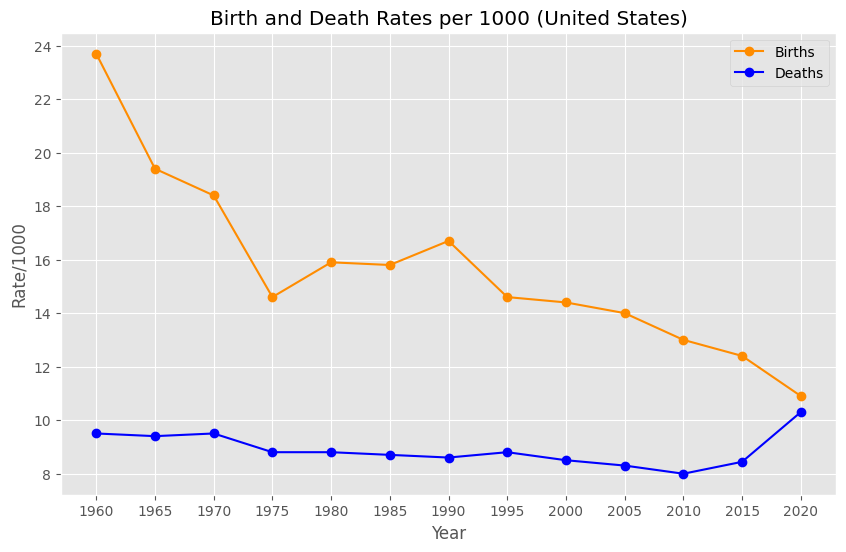

In [9]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (United States)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(us_birth, color='darkorange', label='Births', marker='o')
plt.plot(us_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/usBirthDeathRates.png', format='png')

Plot USA's Total Population and Population over 65

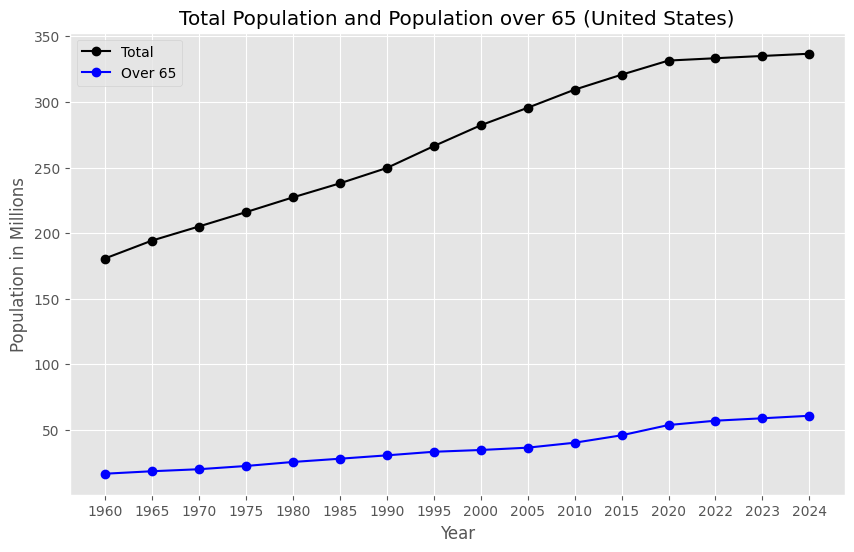

In [10]:
# Scale population data to make plot easier to read
us_over65_scaled = us_over65.apply(lambda x: x/1000000)
us_total_scaled = us_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (United States)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(us_total_scaled, color='black', label='Total', marker='o')
plt.plot(us_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/usTotalandOver65.png', format='png')

Plot USA's Growth in Percent

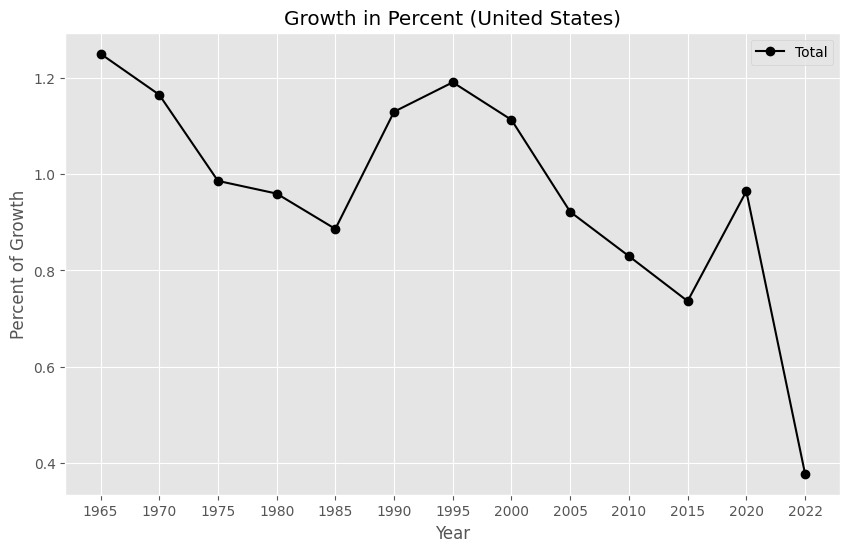

In [11]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (United States)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(us_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/usGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot China population data

In [12]:
# Drop unused column
chn.drop('country', inplace=True, axis=1)
cn_birth = chn.iloc[0]  # Birthrate per 1000
cn_death = chn.iloc[1]  # Deathrate per 1000
cn_over65 = chn.iloc[2] # Population of people 65 and older
cn_growth = chn.iloc[3] # Percent of population change
cn_total = chn.iloc[4]  # Total population

Plot China's birth and death rates

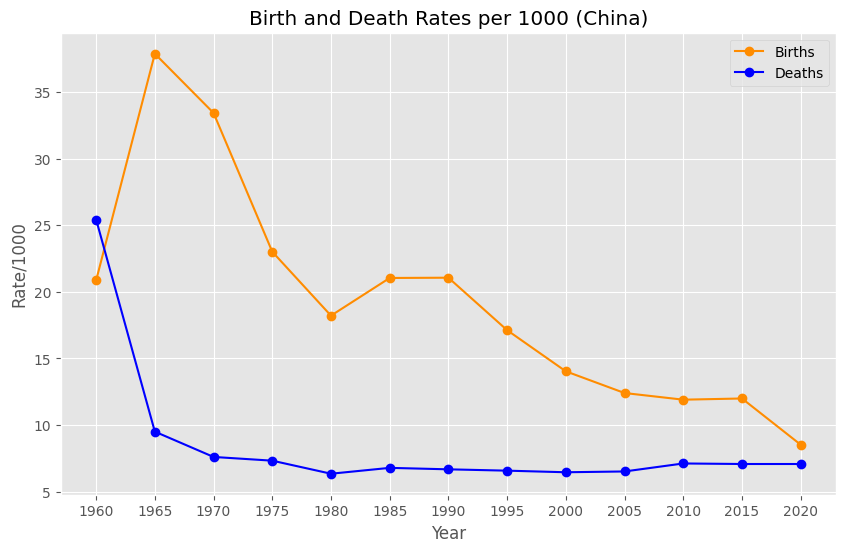

In [13]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (China)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(cn_birth, color='darkorange', label='Births', marker='o')
plt.plot(cn_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/cnBirthDeathRates.png', format='png')

Plot USA's Total Population and Population over 65

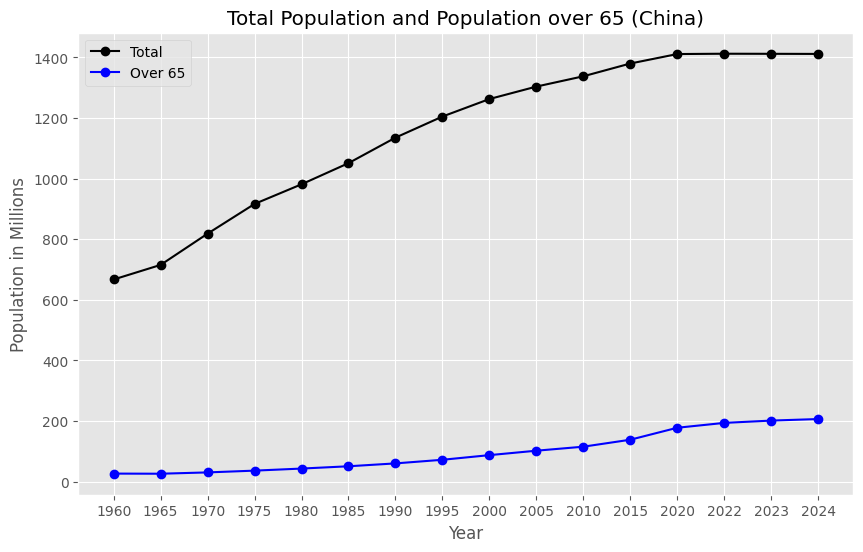

In [14]:
# Scale population data to make plot easier to read
cn_over65_scaled = cn_over65.apply(lambda x: x/1000000)
cn_total_scaled = cn_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (China)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(cn_total_scaled, color='black', label='Total', marker='o')
plt.plot(cn_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/cnTotalandOver65.png', format='png')

Plot China's Growth in Percent

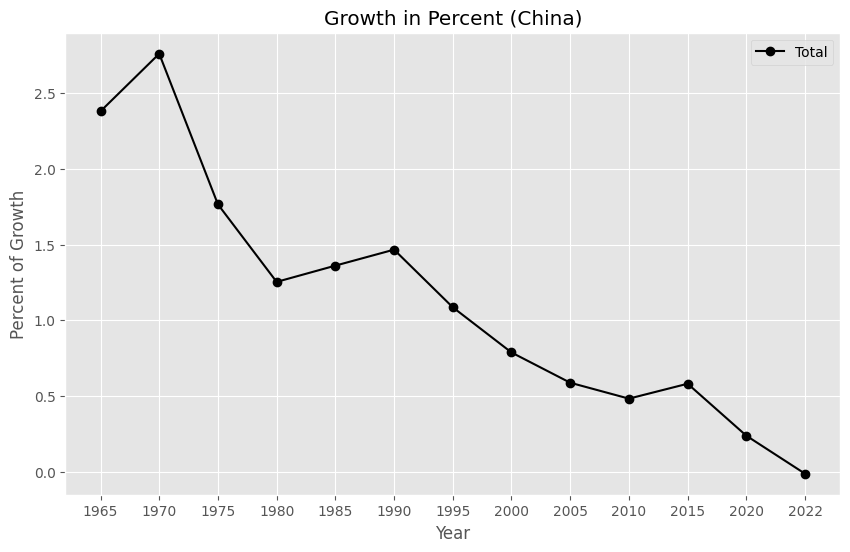

In [15]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (China)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(cn_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/cnGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot Germany population data

In [16]:
# Drop unused column
deu.drop('country', inplace=True, axis=1)
de_birth = deu.iloc[0]  # Birthrate per 1000
de_death = deu.iloc[1]  # Deathrate per 1000
de_over65 = deu.iloc[2] # Population of people 65 and older
de_growth = deu.iloc[3] # Percent of population change
de_total = deu.iloc[4]  # Total population

Plot Germany's birth and death rates

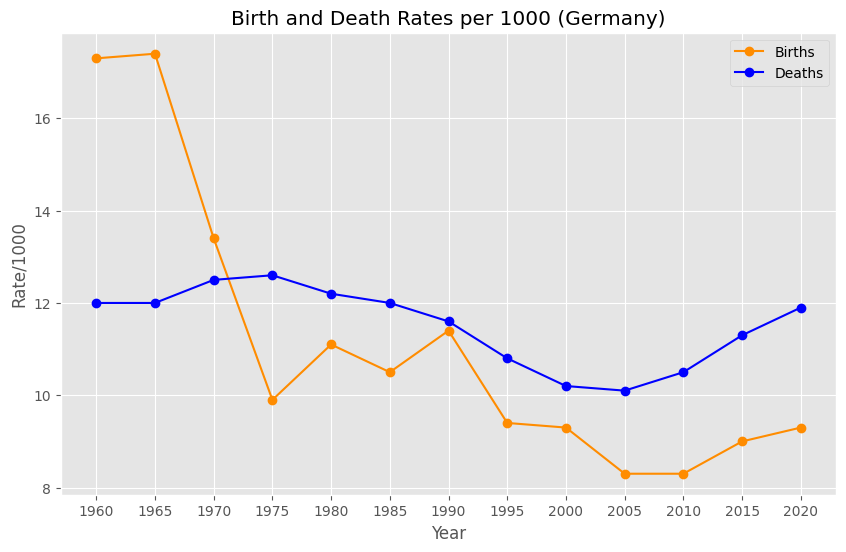

In [17]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (Germany)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(de_birth, color='darkorange', label='Births', marker='o')
plt.plot(de_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/deBirthDeathRates.png', format='png')

Plot Germany's Total Population and Population over 65

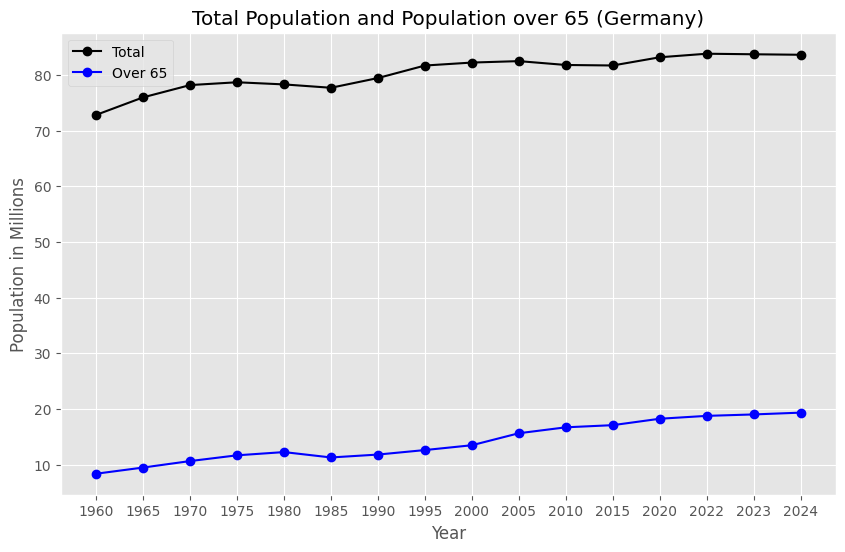

In [18]:
# Scale population data to make plot easier to read
de_over65_scaled = de_over65.apply(lambda x: x/1000000)
de_total_scaled = de_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Germany)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(de_total_scaled, color='black', label='Total', marker='o')
plt.plot(de_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/deTotalandOver65.png', format='png')

Plot Germany's Growth in Percent

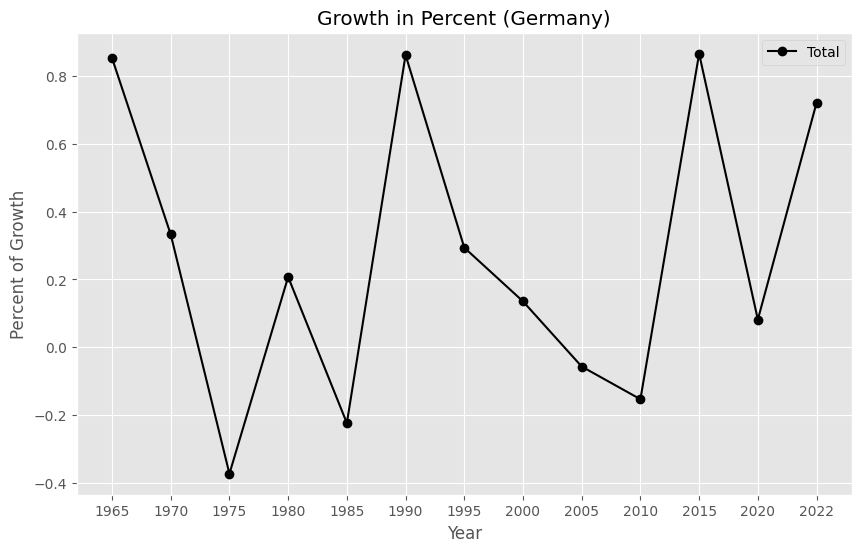

In [19]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Germany)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(de_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/deGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot Japan population data

In [20]:
# Drop unused column
jpn.drop('country', inplace=True, axis=1)
jp_birth = jpn.iloc[0]  # Birthrate per 1000
jp_death = jpn.iloc[1]  # Deathrate per 1000
jp_over65 = jpn.iloc[2] # Population of people 65 and older
jp_growth = jpn.iloc[3] # Percent of population change
jp_total = jpn.iloc[4]  # Total population

Plot Japan's birth and death rates

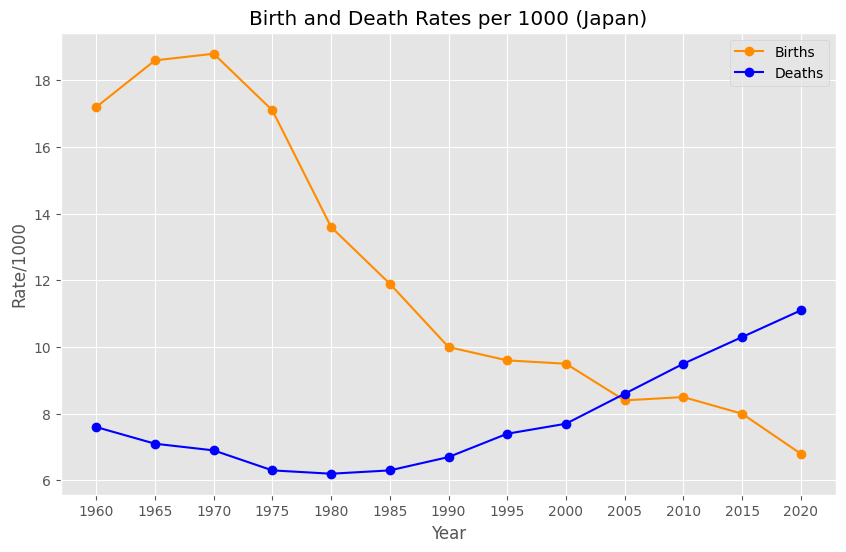

In [21]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (Japan)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(jp_birth, color='darkorange', label='Births', marker='o')
plt.plot(jp_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/jpBirthDeathRates.png', format='png')

Plot Japan's Total Population and Population over 65

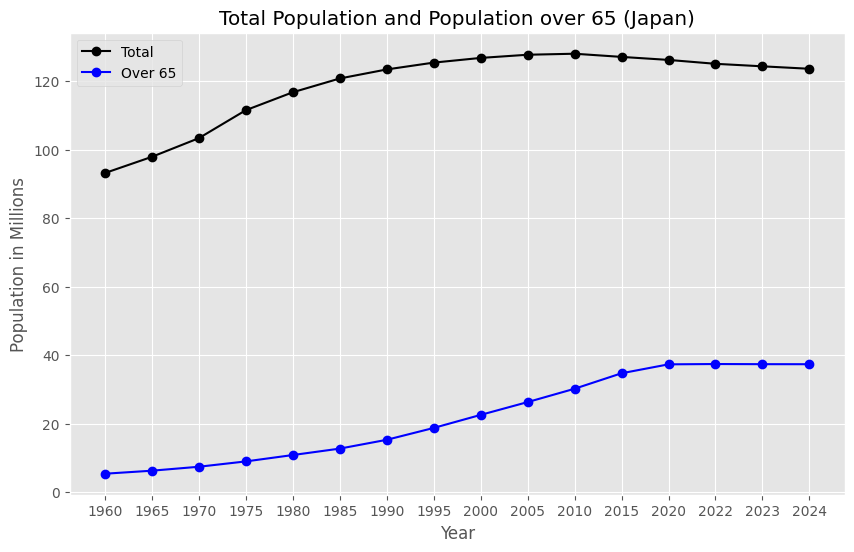

In [22]:
# Scale population data to make plot easier to read
jp_over65_scaled = jp_over65.apply(lambda x: x/1000000)
jp_total_scaled = jp_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Japan)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(jp_total_scaled, color='black', label='Total', marker='o')
plt.plot(jp_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/jpTotalandOver65.png', format='png')

Plot Japan's Growth in Percent

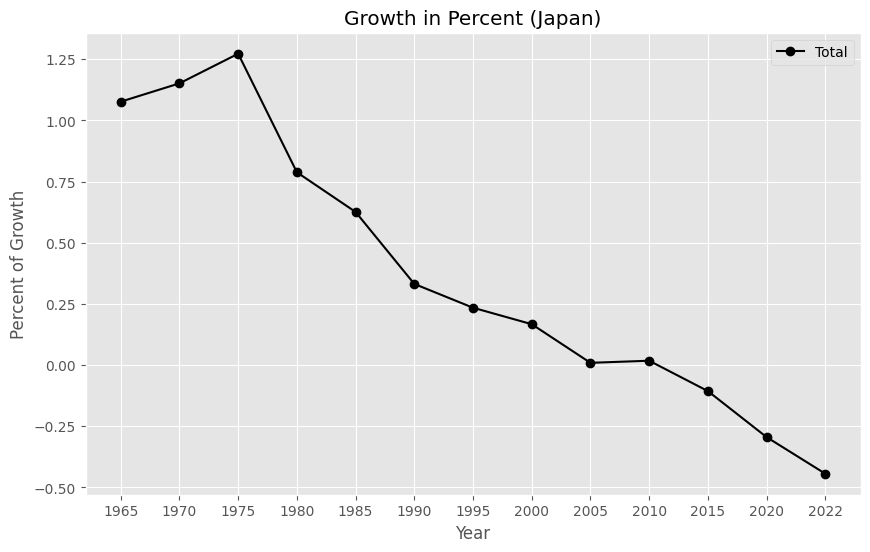

In [23]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Japan)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(jp_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/jpGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot India population data

In [24]:
# Drop unused column
ind.drop('country', inplace=True, axis=1)
in_birth = ind.iloc[0]  # Birthrate per 1000
in_death = ind.iloc[1]  # Deathrate per 1000
in_over65 = ind.iloc[2] # Population of people 65 and older
in_growth = ind.iloc[3] # Percent of population change
in_total = ind.iloc[4]  # Total population

Plot India's birth and death rates

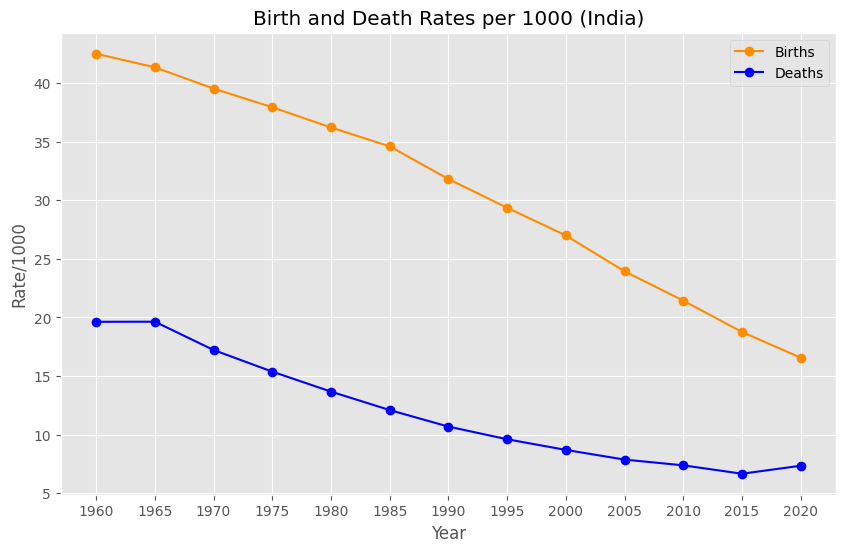

In [25]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (India)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(in_birth, color='darkorange', label='Births', marker='o')
plt.plot(in_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/inBirthDeathRates.png', format='png')

Plot India's Total Population and Population over 65

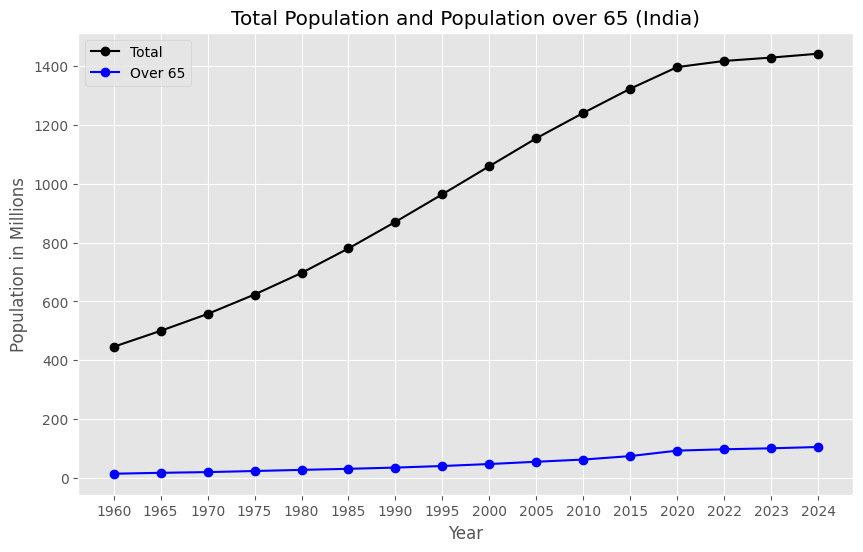

In [26]:
# Scale population data to make plot easier to read
in_over65_scaled = in_over65.apply(lambda x: x/1000000)
in_total_scaled = in_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (India)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(in_total_scaled, color='black', label='Total', marker='o')
plt.plot(in_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/inTotalandOver65.png', format='png')

Plot India's Growth in Percent

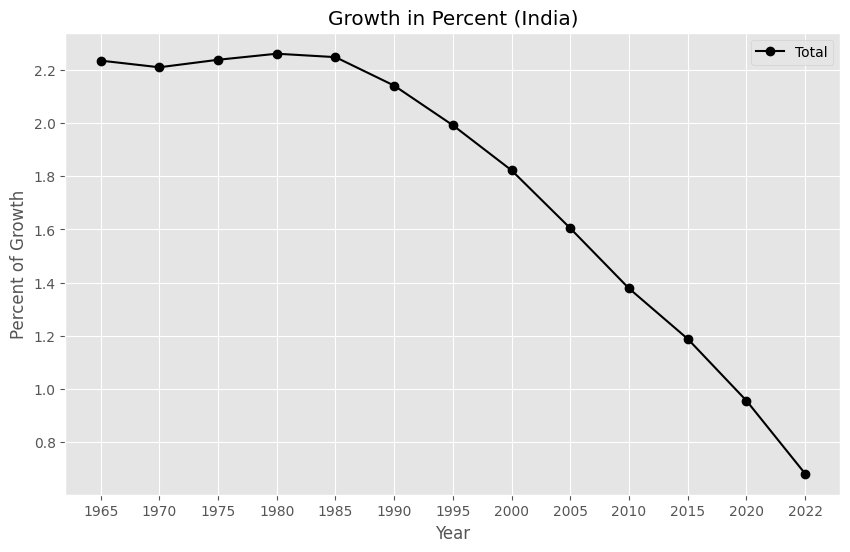

In [27]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (India)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(in_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/inGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot United Kingdom population data

In [28]:
# Drop unused column
gbr.drop('country', inplace=True, axis=1)
uk_birth = gbr.iloc[0]  # Birthrate per 1000
uk_death = gbr.iloc[1]  # Deathrate per 1000
uk_over65 = gbr.iloc[2] # Population of people 65 and older
uk_growth = gbr.iloc[3] # Percent of population change
uk_total = gbr.iloc[4]  # Total population

Plot United Kingdom's birth and death rates

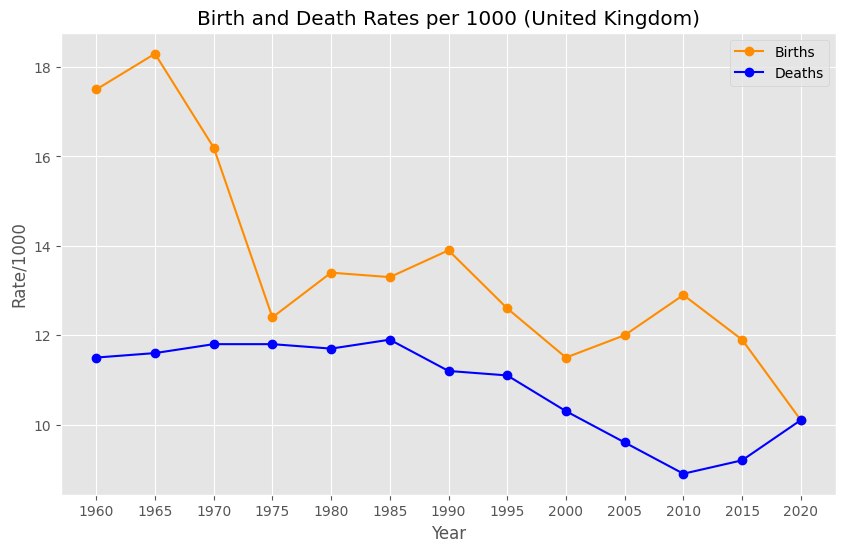

In [29]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (United Kingdom)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(uk_birth, color='darkorange', label='Births', marker='o')
plt.plot(uk_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/ukBirthDeathRates.png', format='png')

Plot United Kingdom's Total Population and Population over 65

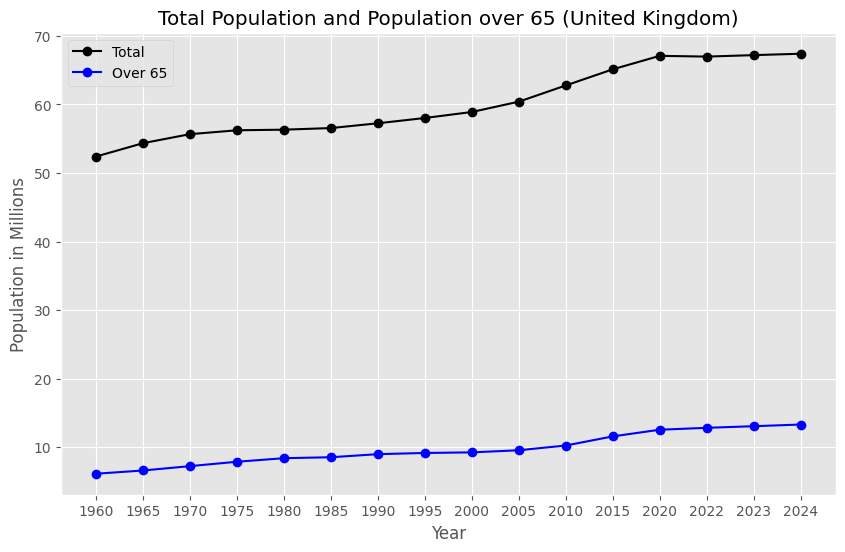

In [30]:
# Scale population data to make plot easier to read
uk_over65_scaled = uk_over65.apply(lambda x: x/1000000)
uk_total_scaled = uk_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (United Kingdom)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(uk_total_scaled, color='black', label='Total', marker='o')
plt.plot(uk_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/ukTotalandOver65.png', format='png')

Plot United Kingdom's Growth in Percent

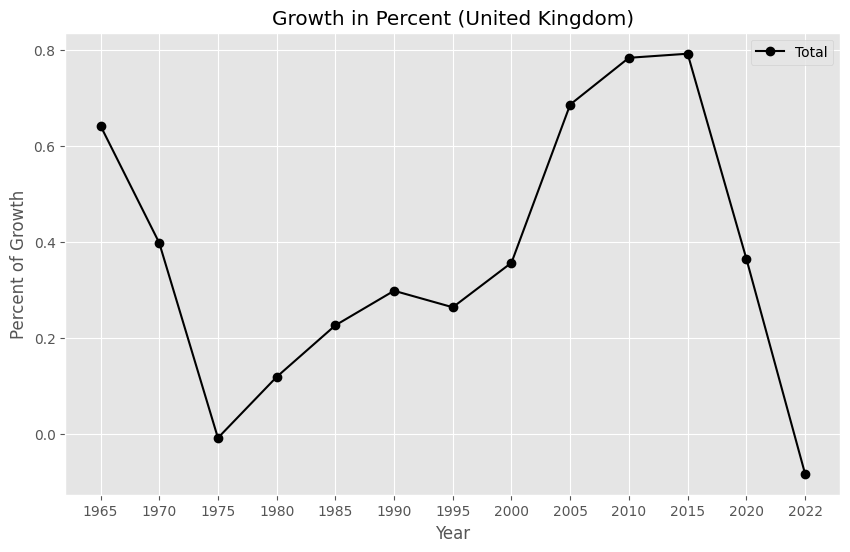

In [31]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (United Kingdom)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(uk_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/ukGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot French population data

In [32]:
# Drop unused column
fra.drop('country', inplace=True, axis=1)
fr_birth = fra.iloc[0]  # Birthrate per 1000
fr_death = fra.iloc[1]  # Deathrate per 1000
fr_over65 = fra.iloc[2] # Population of people 65 and older
fr_growth = fra.iloc[3] # Percent of population change
fr_total = fra.iloc[4]  # Total population

Plot France's birth and death rates

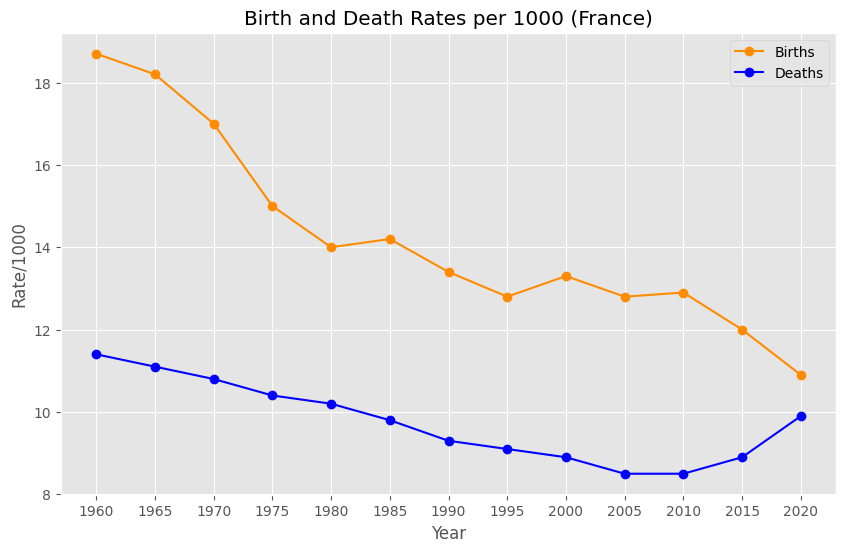

In [33]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (France)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(fr_birth, color='darkorange', label='Births', marker='o')
plt.plot(fr_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/frBirthDeathRates.png', format='png')

Plot France's Total Population and Population over 65

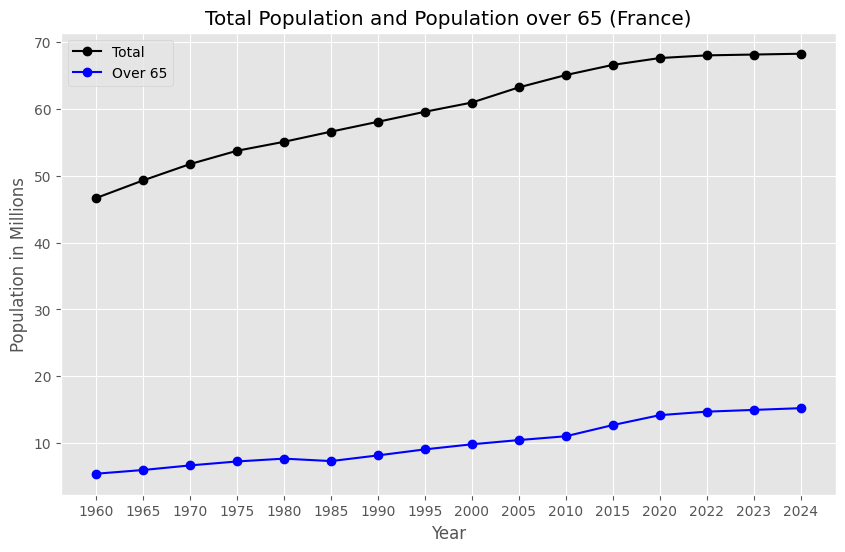

In [34]:
# Scale population data to make plot easier to read
fr_over65_scaled = fr_over65.apply(lambda x: x/1000000)
fr_total_scaled = fr_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (France)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(fr_total_scaled, color='black', label='Total', marker='o')
plt.plot(fr_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/frTotalandOver65.png', format='png')

Plot United France's Growth in Percent

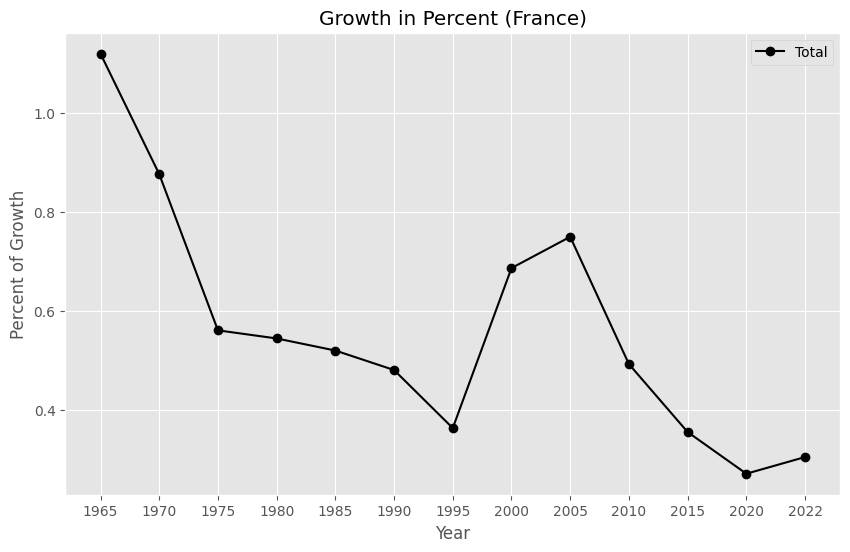

In [35]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (France)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(fr_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/frGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot Italian population data

In [36]:
# Drop unused column
ita.drop('country', inplace=True, axis=1)
it_birth = ita.iloc[0]  # Birthrate per 1000
it_death = ita.iloc[1]  # Deathrate per 1000
it_over65 = ita.iloc[2] # Population of people 65 and older
it_growth = ita.iloc[3] # Percent of population change
it_total = ita.iloc[4]  # Total population

Plot Italy's birth and death rates

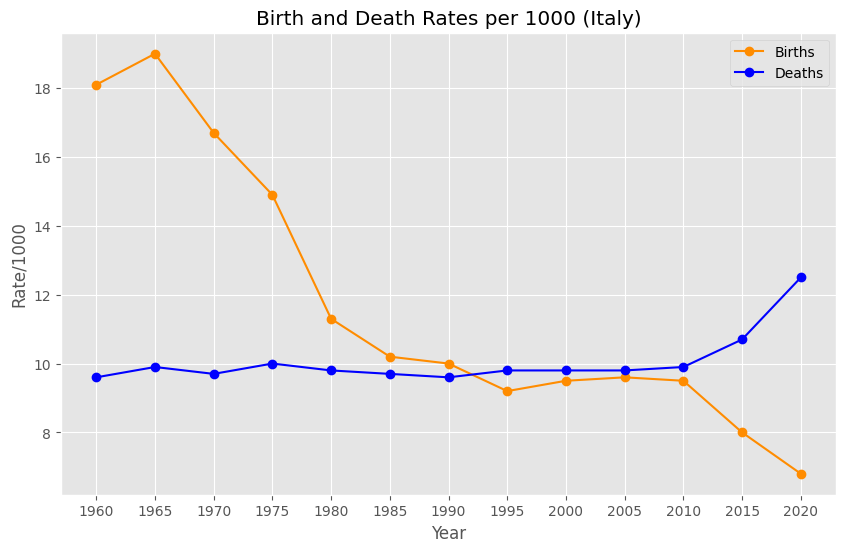

In [37]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (Italy)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(it_birth, color='darkorange', label='Births', marker='o')
plt.plot(it_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/itBirthDeathRates.png', format='png')

Plot Italy's Total Population and Population over 65

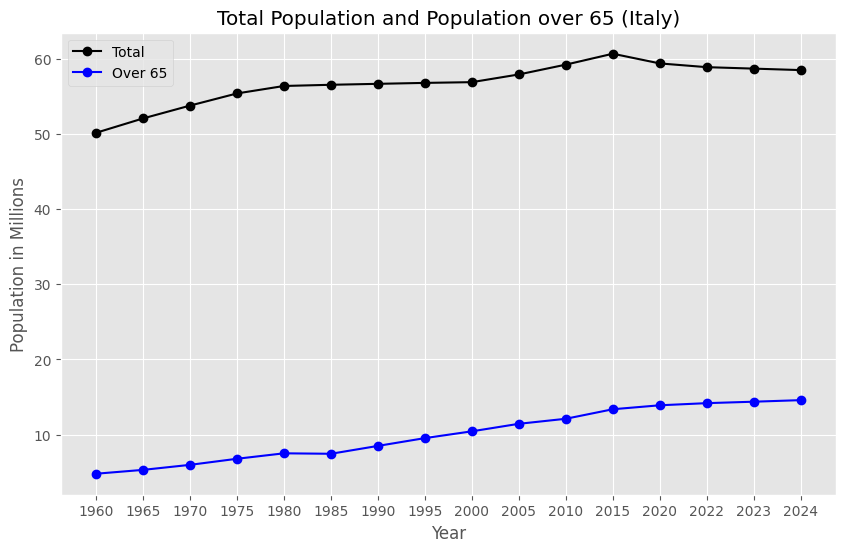

In [38]:
# Scale population data to make plot easier to read
it_over65_scaled = it_over65.apply(lambda x: x/1000000)
it_total_scaled = it_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Italy)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(it_total_scaled, color='black', label='Total', marker='o')
plt.plot(it_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/itTotalandOver65.png', format='png')

Plot Italy's Growth in Percent

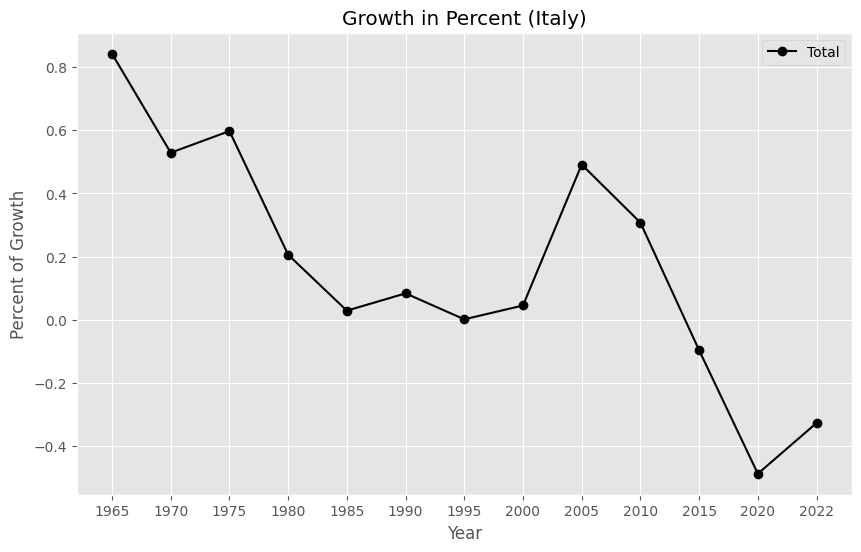

In [39]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Italy)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(it_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/itGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot Brazilian population data

In [40]:
# Drop unused column
bra.drop('country', inplace=True, axis=1)
br_birth = bra.iloc[0]  # Birthrate per 1000
br_death = bra.iloc[1]  # Deathrate per 1000
br_over65 = bra.iloc[2] # Population of people 65 and older
br_growth = bra.iloc[3] # Percent of population change
br_total = bra.iloc[4]  # Total population

Plot Brazil's birth and death rates

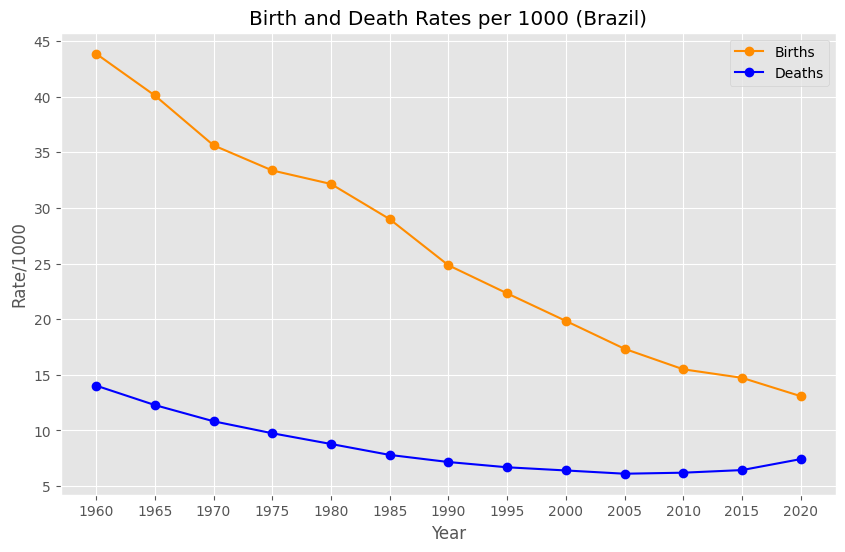

In [41]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (Brazil)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(br_birth, color='darkorange', label='Births', marker='o')
plt.plot(br_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/brBirthDeathRates.png', format='png')

Plot Brazil's Total Population and Population over 65

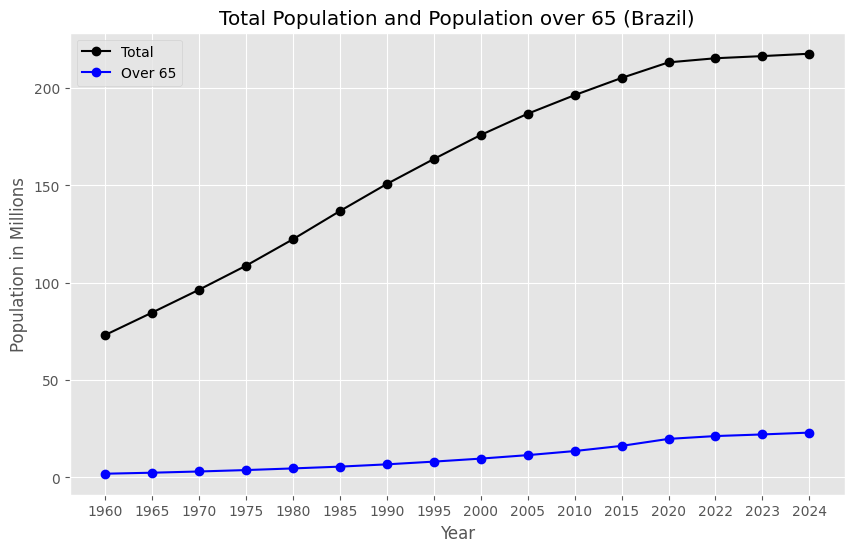

In [42]:
# Scale population data to make plot easier to read
br_over65_scaled = br_over65.apply(lambda x: x/1000000)
br_total_scaled = br_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Brazil)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(br_total_scaled, color='black', label='Total', marker='o')
plt.plot(br_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/brTotalandOver65.png', format='png')

Plot Brazil's Growth in Percent

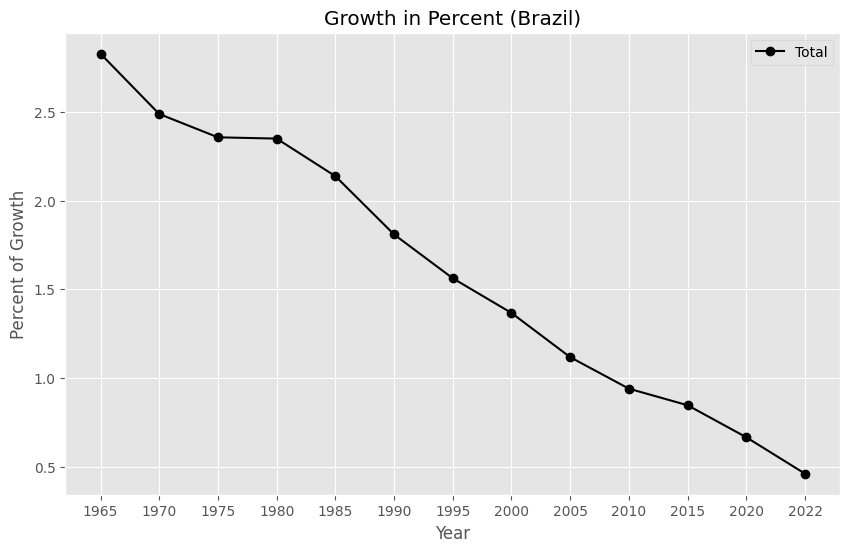

In [43]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Brazil)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(br_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/brGowthPercent.png', format='png')

---------------------------------------------------------------------
Create dataframes and series to plot Canadian population data

In [44]:
# Drop unused column
can.drop('country', inplace=True, axis=1)
ca_birth = can.iloc[0]  # Birthrate per 1000
ca_death = can.iloc[1]  # Deathrate per 1000
ca_over65 = can.iloc[2] # Population of people 65 and older
ca_growth = can.iloc[3] # Percent of population change
ca_total = can.iloc[4]  # Total population

Plot Canada's birth and death rates

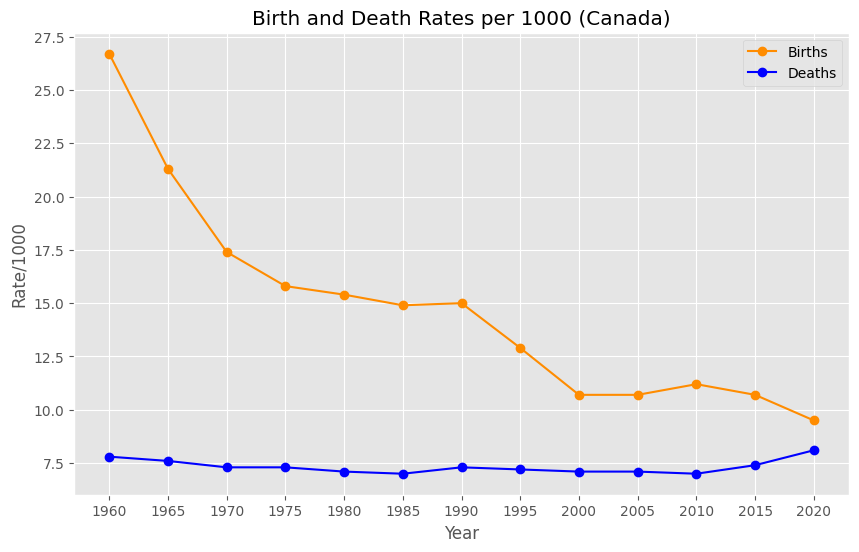

In [45]:
plt.figure(figsize=(10,6))
plt.title('Birth and Death Rates per 1000 (Canada)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(ca_birth, color='darkorange', label='Births', marker='o')
plt.plot(ca_death, color='blue', label='Deaths', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/caBirthDeathRates.png', format='png')

Plot Canada's Total Population and Population over 65

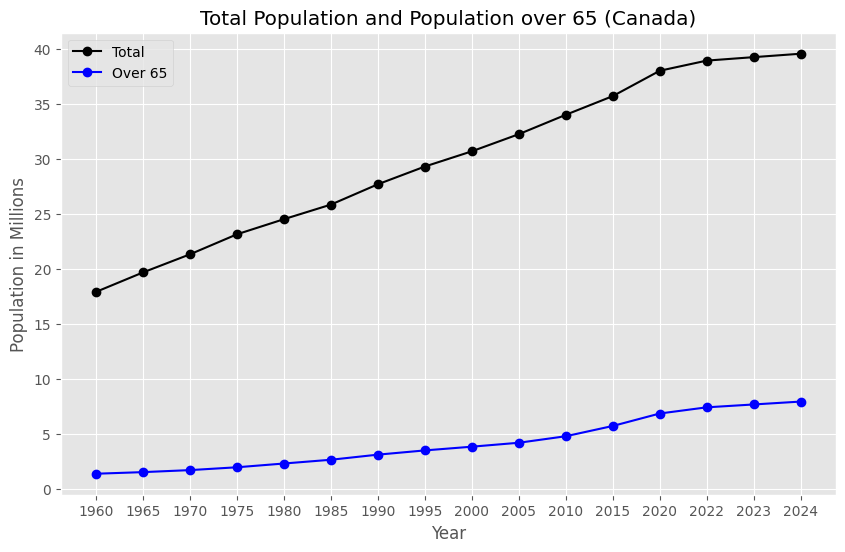

In [46]:
# Scale population data to make plot easier to read
ca_over65_scaled = ca_over65.apply(lambda x: x/1000000)
ca_total_scaled = ca_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Canada)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(ca_total_scaled, color='black', label='Total', marker='o')
plt.plot(ca_over65_scaled, color='blue', label='Over 65', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/caTotalandOver65.png', format='png')

Plot Brazil's Growth in Percent

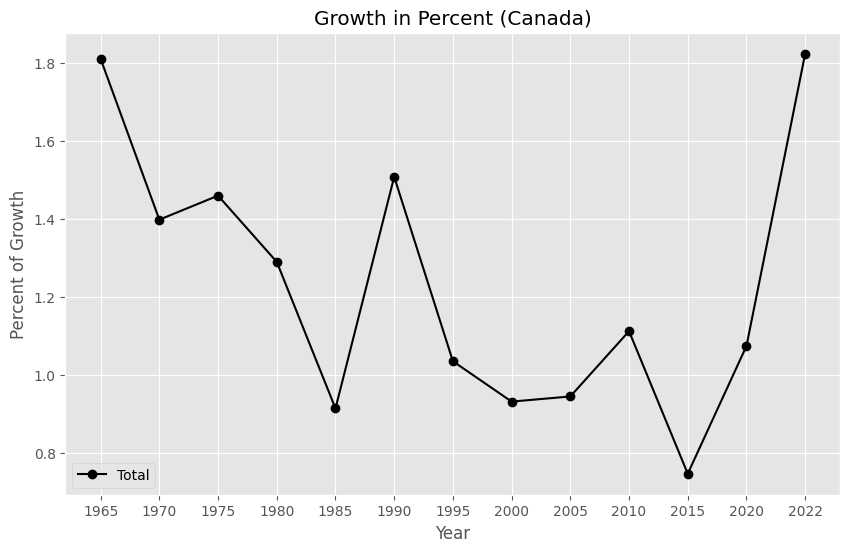

In [47]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Canada)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(ca_growth, color='black', label='Total', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/caGowthPercent.png', format='png')

------------------------------------------------------------
Summary Charts

Birth Rate Summary Chart

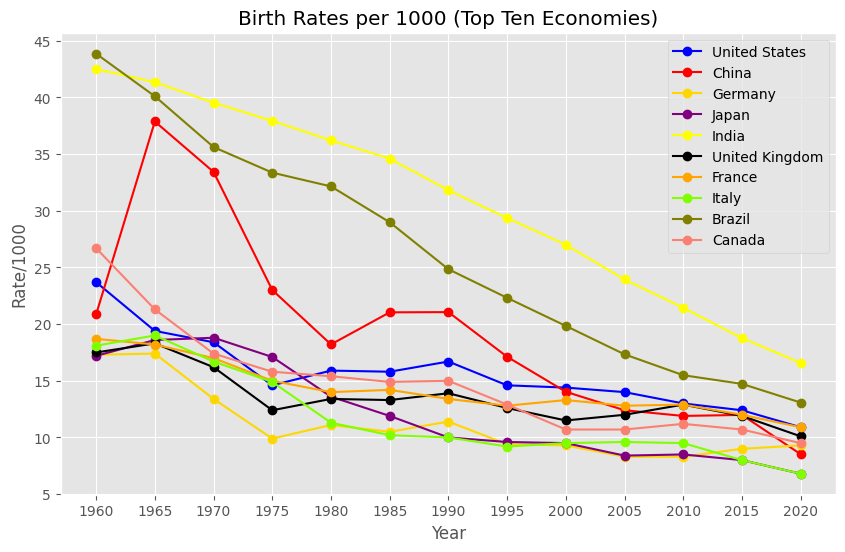

In [48]:
plt.figure(figsize=(10,6))
plt.title('Birth Rates per 1000 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(us_birth, color='blue', label='United States', marker='o')
plt.plot(cn_birth, color='red', label='China', marker='o')
plt.plot(de_birth, color='gold', label='Germany', marker='o')
plt.plot(jp_birth, color='purple', label='Japan', marker='o')
plt.plot(in_birth, color='yellow', label='India', marker='o')
plt.plot(uk_birth, color='black', label='United Kingdom', marker='o')
plt.plot(fr_birth, color='orange', label='France', marker='o')
plt.plot(it_birth, color='chartreuse', label='Italy', marker='o')
plt.plot(br_birth, color='olive', label='Brazil', marker='o')
plt.plot(ca_birth, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumBirthRates.png', format='png')

Death rate summary chart

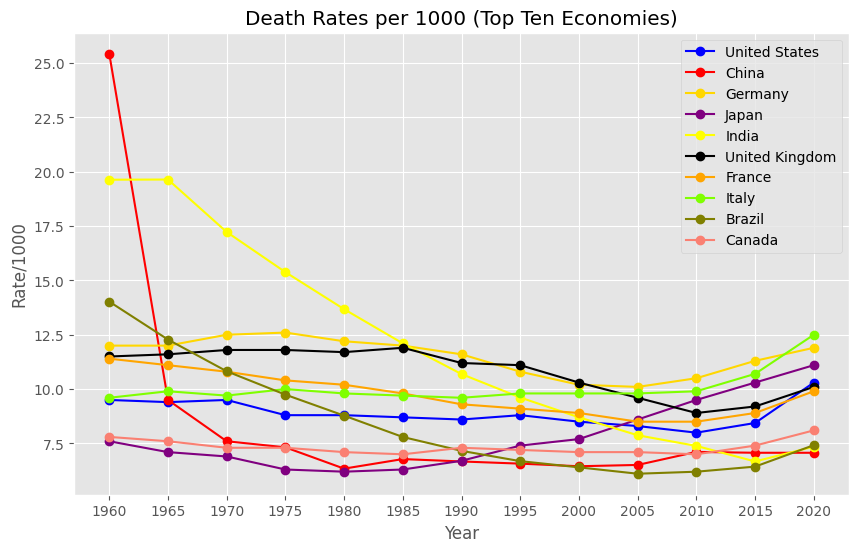

In [49]:
plt.figure(figsize=(10,6))
plt.title('Death Rates per 1000 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(us_death, color='blue', label='United States', marker='o')
plt.plot(cn_death, color='red', label='China', marker='o')
plt.plot(de_death, color='gold', label='Germany', marker='o')
plt.plot(jp_death, color='purple', label='Japan', marker='o')
plt.plot(in_death, color='yellow', label='India', marker='o')
plt.plot(uk_death, color='black', label='United Kingdom', marker='o')
plt.plot(fr_death, color='orange', label='France', marker='o')
plt.plot(it_death, color='chartreuse', label='Italy', marker='o')
plt.plot(br_death, color='olive', label='Brazil', marker='o')
plt.plot(ca_death, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumDeathRates.png', format='png')

Over 65 Summary Chart

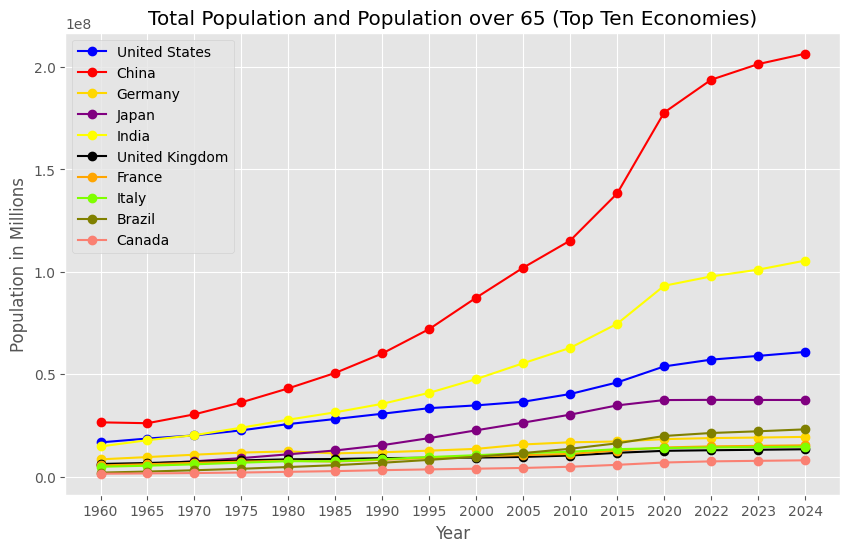

In [50]:
# Scale population data to make plot easier to read
ca_over65_scaled = ca_over65.apply(lambda x: x/1000000)
ca_total_scaled = ca_total.apply(lambda x: x/1000000)
plt.figure(figsize=(10,6))
plt.title('Total Population and Population over 65 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(us_over65, color='blue', label='United States', marker='o')
plt.plot(cn_over65, color='red', label='China', marker='o')
plt.plot(de_over65, color='gold', label='Germany', marker='o')
plt.plot(jp_over65, color='purple', label='Japan', marker='o')
plt.plot(in_over65, color='yellow', label='India', marker='o')
plt.plot(uk_over65, color='black', label='United Kingdom', marker='o')
plt.plot(fr_over65, color='orange', label='France', marker='o')
plt.plot(it_over65, color='chartreuse', label='Italy', marker='o')
plt.plot(br_over65, color='olive', label='Brazil', marker='o')
plt.plot(ca_over65, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumTotalandOver65.png', format='png')

Summary Percent Change in Population

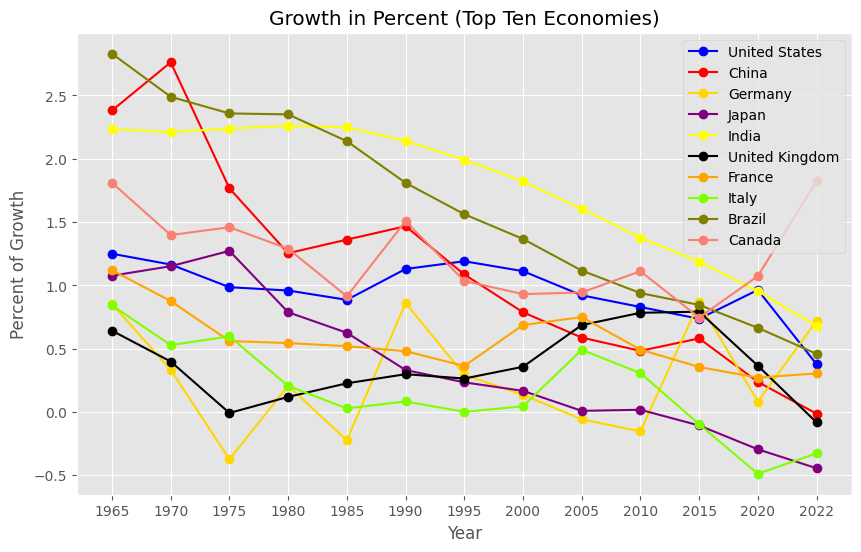

In [51]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(us_growth, color='blue', label='United States', marker='o')
plt.plot(cn_growth, color='red', label='China', marker='o')
plt.plot(de_growth, color='gold', label='Germany', marker='o')
plt.plot(jp_growth, color='purple', label='Japan', marker='o')
plt.plot(in_growth, color='yellow', label='India', marker='o')
plt.plot(uk_growth, color='black', label='United Kingdom', marker='o')
plt.plot(fr_growth, color='orange', label='France', marker='o')
plt.plot(it_growth, color='chartreuse', label='Italy', marker='o')
plt.plot(br_growth, color='olive', label='Brazil', marker='o')
plt.plot(ca_growth, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumGowthPercent.png', format='png')

Total Population Summary

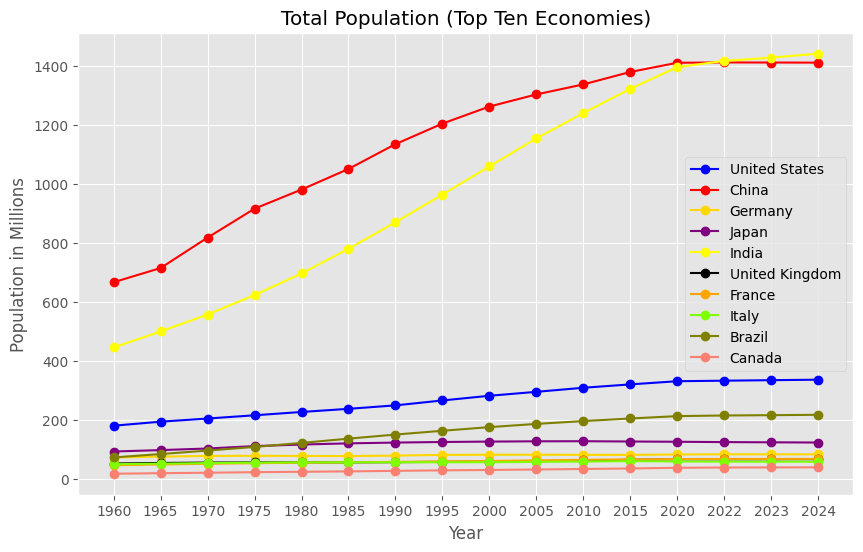

In [52]:
plt.figure(figsize=(10,6))
plt.title('Total Population (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(us_total_scaled, color='blue', label='United States', marker='o')
plt.plot(cn_total_scaled, color='red', label='China', marker='o')
plt.plot(de_total_scaled, color='gold', label='Germany', marker='o')
plt.plot(jp_total_scaled, color='purple', label='Japan', marker='o')
plt.plot(in_total_scaled, color='yellow', label='India', marker='o')
plt.plot(uk_total_scaled, color='black', label='United Kingdom', marker='o')
plt.plot(fr_total_scaled, color='orange', label='France', marker='o')
plt.plot(it_total_scaled, color='chartreuse', label='Italy', marker='o')
plt.plot(br_total_scaled, color='olive', label='Brazil', marker='o')
plt.plot(ca_total_scaled, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumTotalPopulation.png', format='png')